In [1]:
from tensorflow.keras.datasets import reuters

In [2]:
(train_data, train_labels), (test_data, test_labels) = reuters.load_data(num_words=10000)

In [4]:
print(len(train_data), "training examples and", len(test_data), "test examples")

8982 training examples and 2246 test examples


In [6]:
print(train_data[10])

[1, 245, 273, 207, 156, 53, 74, 160, 26, 14, 46, 296, 26, 39, 74, 2979, 3554, 14, 46, 4689, 4329, 86, 61, 3499, 4795, 14, 61, 451, 4329, 17, 12]


In [7]:
# Decode newswires back to text
word_index = reuters.get_word_index()
reverse_word_index = dict([(value, key) for (key, value) in word_index.items()])
decoded_newswire = " ".join([reverse_word_index.get(i-3, "?") for i in train_data[0]])

550378/550378 [==============================] - 0s 0us/step


In [8]:
train_labels[10] # The label associated with an example is an integer between 0 and 45, a topic index

3

In [10]:
# Encode the input data
import numpy as np
def vectorise_sequences(sequences, dimension=10000):
    results = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):
        for j in sequence:
            results[i, j] = 1. # Set specific indices of results[i] to 1s
    return results
x_train = vectorise_sequences(train_data)
x_test = vectorise_sequences(test_data)

In [11]:
def to_one_hot(labels, dimension=46):
    results = np.zeros((len(labels), dimension))
    for i, label in enumerate(labels):
        results[i, label] = 1.
    return results
# New constraint: the number of output classes has gone from 2 to 46

y_train = to_one_hot(train_labels)
y_test = to_one_hot(test_labels)

from tensorflow.keras.utils import to_categorical
y_train = to_categorical(train_labels)
y_test = to_categorical(test_labels)

In [17]:
# Model definition
from tensorflow import keras
from keras import layers
model = keras.Sequential([
    layers.Dense(64, activation="relu"),
    layers.Dense(64, activation="relu"),
    layers.Dense(46, activation="softmax")
    # Output a probability distribution over the 46 different output classes
    # 46 scores will sum to 1
])

In [18]:
model.compile(optimizer="rmsprop", loss="categorical_crossentropy", metrics=["accuracy"])

In [19]:
# Set aside a validation set
x_val = x_train[:1000]
partial_x_train = x_train[1000:]
y_val = y_train[:1000]
partial_y_train = y_train[1000:]

In [20]:
# Train the model
history = model.fit(partial_x_train, partial_y_train,
                    epochs=20, batch_size=512, validation_data=(x_val, y_val))

Epoch 1/20
16/16 [==============================] - 1s 28ms/step - loss: 2.7580 - accuracy: 0.4614 - val_loss: 1.8121 - val_accuracy: 0.6320
Epoch 2/20
16/16 [==============================] - 0s 16ms/step - loss: 1.5161 - accuracy: 0.6887 - val_loss: 1.3954 - val_accuracy: 0.6990
Epoch 3/20
16/16 [==============================] - 0s 15ms/step - loss: 1.1652 - accuracy: 0.7516 - val_loss: 1.1942 - val_accuracy: 0.7370
Epoch 4/20
16/16 [==============================] - 0s 16ms/step - loss: 0.9602 - accuracy: 0.7954 - val_loss: 1.0956 - val_accuracy: 0.7560
Epoch 5/20
16/16 [==============================] - 0s 19ms/step - loss: 0.7952 - accuracy: 0.8276 - val_loss: 1.0299 - val_accuracy: 0.7660
Epoch 6/20
16/16 [==============================] - 0s 17ms/step - loss: 0.6684 - accuracy: 0.8529 - val_loss: 1.0193 - val_accuracy: 0.7890
Epoch 7/20
16/16 [==============================] - 0s 16ms/step - loss: 0.5582 - accuracy: 0.8796 - val_loss: 0.9209 - val_accuracy: 0.8020
Epoch 8/20
16

In [22]:
history_dict = history.history

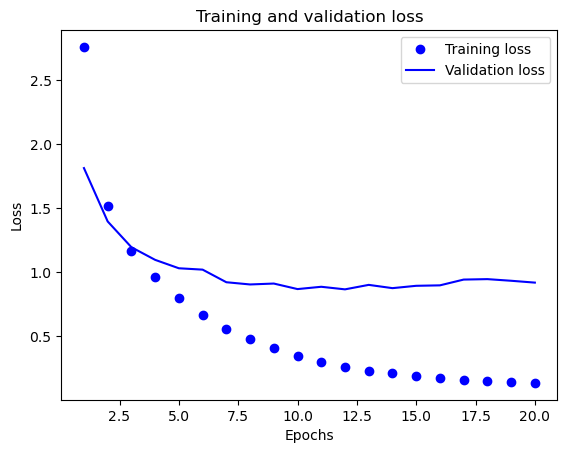

In [23]:
# Plot the training and validation loss
import matplotlib.pyplot as plt
loss_values = history_dict["loss"]
val_loss_values = history_dict["val_loss"]
epochs = range(1, len(loss_values) + 1)

plt.plot(epochs, loss_values, "bo", label="Training loss") # "bo" is for "blue dot"
plt.plot(epochs, val_loss_values, "b", label="Validation loss") # "b" is for "solid blue line"
plt.title("Training and validation loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

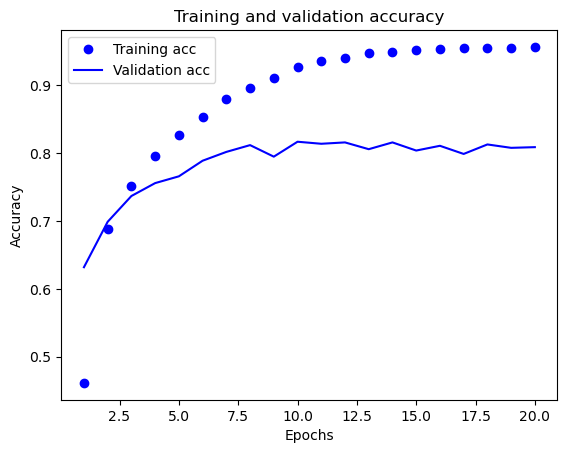

In [24]:
# Plot the training and validation accuracy
acc = history_dict["accuracy"]
val_acc = history_dict["val_accuracy"]

plt.clf()
plt.plot(epochs, acc, "bo", label="Training acc")
plt.plot(epochs, val_acc, "b", label="Validation acc")
plt.title("Training and validation accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

In [25]:
# Retrain the model from scratch
model = keras.Sequential([
    layers.Dense(64, activation="relu"),
    layers.Dense(64, activation="relu"),
    layers.Dense(46, activation="softmax")
])
model.compile(optimizer="rmsprop", loss="categorical_crossentropy", metrics="accuracy")
model.fit(x_train, y_train, epochs=9, batch_size=512)
results = model.evaluate(x_test, y_test)

Epoch 1/9
18/18 [==============================] - 1s 14ms/step - loss: 2.7480 - accuracy: 0.5008
Epoch 2/9
18/18 [==============================] - 0s 13ms/step - loss: 1.4887 - accuracy: 0.6869
Epoch 3/9
18/18 [==============================] - 0s 14ms/step - loss: 1.1343 - accuracy: 0.7544
Epoch 4/9
18/18 [==============================] - 0s 13ms/step - loss: 0.9308 - accuracy: 0.7987
Epoch 5/9
18/18 [==============================] - 0s 12ms/step - loss: 0.7728 - accuracy: 0.8291
Epoch 6/9
18/18 [==============================] - 0s 13ms/step - loss: 0.6435 - accuracy: 0.8614
Epoch 7/9
18/18 [==============================] - 0s 13ms/step - loss: 0.5317 - accuracy: 0.8879
Epoch 8/9
18/18 [==============================] - 0s 15ms/step - loss: 0.4445 - accuracy: 0.9075
Epoch 9/9
71/71 [==============================] - 0s 2ms/step - loss: 0.9070 - accuracy: 0.7912


In [26]:
results

[0.9070040583610535, 0.7911843061447144]

In [27]:
# Generate predictions on new data
predictions = model.predict(x_test)

71/71 [==============================] - 0s 2ms/step


In [28]:
predictions[0].shape

(46,)

In [29]:
np.sum(predictions[0]) # Coefficients in this vector sum to 1, as they form a probability distribution

1.0000002

In [30]:
np.argmax(predictions[0]) # Largest entry is the predicted class (the class with the highest probability)

3

### A different way to handle the labels and the loss

In [33]:
y_train = np.array(train_labels)
y_test = np.array(test_labels)

In [34]:
y_train

array([ 3,  4,  3, ..., 25,  3, 25], dtype=int64)

In [35]:
model.compile(optimizer="rmsprop", loss="sparse_categorical_crossentropy", metrics=["accuracy"])
# With integer labels, sparse_categorical_crossentropy should be used,
# instead of categorical_crossentropy